<a href="https://colab.research.google.com/github/MatiasVelazcoGonzalez/Hitos_Analisis_de_datos-/blob/main/Copia_de_Hito_2_Mati_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hito 2: Aplicación de técnicas de aprendizaje supervisado en propiedades geometalúrgicas

Fecha de entrega: 7 septiembre

Integrantes:
- Scarlett Duran  
- Matias Velazco  
- Andreina Isabel Manrique Espin  
- Paz Montaño  
- Sebastián Galleguillos Neyth  

## Objetivo de esta etapa

Para esta segunda etapa, se tienen dos bases de datos a trabajar: 1. Compositos.csv, correspondientes a la base datos organizada en el Hito 1 y 2. MB.csv correspondiente una caracterización geológica y geoestadística del yacimiento en estudio a través de un modelo de bloques del Hito 2.

Se solicita generar modelos de regresión para estimar el consumo especifico de energía (CCE) en este modelo de bloques y modelos de clasificación para determinar a nivel de modelo de bloques los sectores donde existirá un alto requerimiento de consumo energético considerando el umbral indicado en el Hito 1.  En específico se le solicita a su equipo lo siguiente:

1. Realizar un análisis exploratorio del modelo de bloques. Considere que este modelo de bloques fue generado e interpretado por el equipo de geología del proyecto, por lo que corresponde a interpretaciones que consideran el contexto regional del área en estudio. No existen errores en esta base de datos, solo algunos datos sin información.  

2. Definir las variables claves para construir los modelos solicitados. Considere para esto que su objetivo final es completar el modelo de bloques con la variable CCE.  

3. Ajustar modelos de regresión para el consumo de energía específico (CCE) usando la base de datos limpia del Hito 1. Los modelos por utilizar deben incluir por lo menos una regresión lineal múltiple, random forest, decision tree y gradient boosting. Comparar las métricas de desempeño en términos del error absoluto medio (MAE), error cuadrático medio (MSE), raíz del error cuadrático medio (RMSE) y tiempo de cómputo para el conjunto de prueba (testing set correspondiente al 10% de los datos disponibles).

4. Evaluar la significancia de las variables utilizadas en su modelo predictivo construido mediante regresión lineal múltiple. Si corresponde, vuelva a ejecutar la regresión lineal múltiple sólo considerando la/s variable/s significativa/s.

5. Para la técnica con mejor desempeño grafique un scatter plot para comparar los valores reales vs los valores estimados de CCE considerando los datos del conjunto de prueba en su escala original.

6. Finalmente, genere un modelo predictivo del CCE en el modelo de bloques (archivo MB.csv) usando el mejor modelo generado en este Hito. Refiérase a la capacidad de generalización que posee su modelo para predecir la propiedad geometalúrgica presente estadísticas descriptivas de las predicciones de CCE.

Debido a la importancia del CCE en la proyección de costos del proyecto minero. Se les pide generar un proyecto que permita determinar sectores donde el consumo energético será elevado. Para esto deben generar modelos de clasificación que permitan dar respuesta a la problemática antes planteada siguiendo el siguiente flujo de trabajo:  

1. Realizar modelos de clasificación para predecir sectores con alto consumo
energético en el modelo de bloques usando la base de datos limpia del Hito 1. Debe utilizar por lo menos Regresión Logística, Decision Tree Classifier y Support Vector Machines. Se deja abierta la posibilidad de ocupar otros modelos supervisados en caso de no obtener una predicción aceptable. Evaluar el desempeño de cada modelo calculando la matriz de confusión y el reporte de clasificación (precisión, recall, f1-score) sobre el conjunto de prueba (testing set de 10%). Adicionalmente reporte el tiempo de cómputo para cada método.

2. Seleccionar el modelo final a utilizar en base a los indicadores anteriormente descritos.

3. Para el modelo final seleccionado ¿Qué tamaño de set de entrenamiento
recomendaría? ¿Qué se gana y qué se pierde al variar el tamaño del conjunto de entrenamiento? Fundamente su respuesta cualitativa y cuantitativamente. Hint: podría utilizar un análisis de bias y/o variance si lo estima conveniente.

4. Predecir en el modelo de bloques (MB.csv) el nivel de consumo energético usando el modelo anteriormente generado. Comente sobre eventuales problemas operaciones, decisiones estratégicas y propuestas que ustedes proponen para el adecuado desarrollo del proyecto.

# 1 Análisis de Datos




## 1.1 Iniciar sesión en google **colab**

In [ ]:
# Iniciamos sesion en nuestro entorno de GDrive
from google.colab import drive
# content/drive es el PATH por defecto donde se encuentra <Mi unidad>
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 1.2 Importando librerias


In [ ]:
# ------------------------------
# Librerías para análisis de datos
# ------------------------------
import numpy as np                # Cálculo numérico, manejo de arreglos y operaciones matemáticas rápidas
import pandas as pd               # Manipulación y análisis de datos en estructuras tipo DataFrame
import math                       # Funciones matemáticas básicas

# ------------------------------
# Visualización
# ------------------------------
import matplotlib.pyplot as plt   # Gráficos básicos y personalizables en 2D
import seaborn as sns             # Visualización estadística más atractiva y de alto nivel
from matplotlib.patches import Patch        # Crear leyendas y formas personalizadas en gráficos de Matplotlib
from matplotlib.colors import Normalize     # Normalización de valores para mapas de color
from matplotlib.cm import ScalarMappable    # Mapeo de valores a colores
from mpl_toolkits.mplot3d import Axes3D     # Gráficos 3D en Matplotlib
import plotly.express as px                 # Gráficos interactivos simples
import plotly.graph_objects as go           # Gráficos interactivos más complejos y personalizables

# ------------------------------
# Estadística y análisis exploratorio
# ------------------------------
from scipy import stats                     # Estadística y funciones científicas (pruebas, distribuciones, etc.)
from scipy.stats import gaussian_kde        # Kernel Density Estimation (KDE) para curvas de densidad
import statsmodels.api as sm                # Modelos estadísticos y econométricos
import statsmodels.formula.api as smf       # Modelos con fórmulas tipo R

# ------------------------------
# Machine Learning / Preprocesamiento
# ------------------------------
from sklearn.impute import KNNImputer       # Imputación de valores faltantes con KNN
from sklearn.preprocessing import MinMaxScaler  # Normalización de datos en un rango (ej. [0,1])


Se utilizaron las librerías anteriores dado que son las más comunes en el manejo de datos y fueron enseñadas en el módulo auxiliar.

##1.3 Lectura y guardado de archivos

A continuación se muestra una tabla que contiene los `readers` y `writers` disponibles.


|   Tipo de Formato   | Descripción de la Data |  Reader  |  Writer |
| -------             | :-----                 |  :-----: | :-----: |
| text   |  CSV |  read_csv | to_csv |
| text |  Fixed-Width Text File| read_fwf |  |
| text   |  JSON | read_json | to_json |
| text   |  HTML |  read_html | to_html |
| text    |  Local clipboard|  read_clipboard | to_clipboard |
|    |  MS Excel |  read_excel | to_excel |
| binary   |  OpenDocument |  read_excel |  |
| binary |  HDF5 Format| read_hdf | to_hdf |
| binary   |  Feather Format | read_feather | to_feather |
| binary   |  Parquet Format |  read_parquet | to_parquet |
| binary    |  ORC Format|  read_orc | |
| binary   |  Msgpack |  read_msgpack | to_msgpack |
| binary |  Stata| read_stata | to_stata |
| binary   |  SAS | read_sas |  |
| binary   |  SPSS |  read_spss |  |
| binary    | Python Pickle Format|  read_pickle | to_pickle |
| SQL   |  SQL |  read_sql | to_sql |
| SQL    | Google BigQuery|  read_gbq | to_gbq |

El detalle de cada una de las funciones se encuentra en el siguiente <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html">link</a>.

### 1.3.1 Busqueda de la ruta del archivo asociada a el MB

In [ ]:
# Buscar el archivo para obtener la ruta exacta
import glob

# Buscar en la carpeta 2025 recursivamente
for f in glob.glob("/content/drive/MyDrive/2025/**/*MB*.csv", recursive=True):
    print(f)

/content/drive/MyDrive/2025/Análisis de Datos/Proyecto/Base_de_Datos/MB.csv


### 1.3.2 Lectura del archivo con ruta encontrada

In [ ]:
# Leer el archivo Excel
df = pd.read_csv("/content/drive/MyDrive/2025/Análisis de Datos/Proyecto/Base_de_Datos/MB.csv")

# Mostrar las primeras filas
df.head()

,EAST,NORTH,ELEV,LITO,RX,AXB,BWI,CUT,CUS,DENSI
0,740.62,-796.88,987.5,20.0,2,31.897,21.945,0.640,0.035,2.713
1,746.88,-796.88,987.5,20.0,2,31.910,21.940,0.617,0.031,2.709
2,753.12,-796.88,987.5,20.0,2,31.877,21.934,0.547,0.024,2.699
3,759.38,-796.88,987.5,20.0,2,31.806,21.926,0.383,0.014,2.709
4,765.62,-796.88,987.5,20.0,2,31.708,21.918,0.379,0.017,2.715


## 1.4 Chequeos de la base de datos

#### 1.4.1 Tipo de variables


In [ ]:
# 1) Estructura general: columnas, tipos, n° de no-nulos, uso de memoria
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106791 entries, 0 to 106790
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EAST    106791 non-null  float64
 1   NORTH   106791 non-null  float64
 2   ELEV    106791 non-null  float64
 3   LITO    104329 non-null  float64
 4   RX      106791 non-null  int64  
 5   AXB     106791 non-null  float64
 6   BWI     106791 non-null  float64
 7   CUT     106791 non-null  float64
 8   CUS     106791 non-null  float64
 9   DENSI   106791 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 8.1 MB


Se observa de la estructura general de la base de datos, que 'LITO' es la variable que cuenta con menos datos en relación a las demas variables.

#### 1.4.2 Valores faltantes por columna


In [ ]:
# Valores faltantes por columna (conteo y porcentaje)
print("\n--- Valores faltantes por columna ---")
for col in df.columns:
    n_missing = df[col].isnull().sum()           # cantidad de NaN
    pct_missing = df[col].isnull().mean() * 100  # porcentaje de NaN
    print(f"La columna \'{col:<5}' tiene {n_missing} datos faltantes ({pct_missing:.2f}%)")



--- Valores faltantes por columna ---
La columna 'EAST ' tiene 0 datos faltantes (0.00%)
La columna 'NORTH' tiene 0 datos faltantes (0.00%)
La columna 'ELEV ' tiene 0 datos faltantes (0.00%)
La columna 'LITO ' tiene 2462 datos faltantes (2.31%)
La columna 'RX   ' tiene 0 datos faltantes (0.00%)
La columna 'AXB  ' tiene 0 datos faltantes (0.00%)
La columna 'BWI  ' tiene 0 datos faltantes (0.00%)
La columna 'CUT  ' tiene 0 datos faltantes (0.00%)
La columna 'CUS  ' tiene 0 datos faltantes (0.00%)
La columna 'DENSI' tiene 0 datos faltantes (0.00%)


#### 1.4.3 Datos duplicados

In [ ]:
# Contar el número de filas duplicadas en todo el DataFrame
n_duplicados_total = df.duplicated().sum()

print(f"Número total de filas duplicadas: {n_duplicados_total}")

# Opcional: Mostrar las filas duplicadas
# print("\nFilas duplicadas:")
# display(df[df.duplicated()])

Número total de filas duplicadas: 0


## 1.5 Resumen Estadístico

In [ ]:
# 2) Resumen estadístico de variables numéricas
#    Incluye percentiles 5%, 50% (mediana) y 95% para ver colas y centro
df.describe(percentiles=[0.05, 0.5, 0.95])


,EAST,NORTH,ELEV,LITO,RX,AXB,BWI,CUT,CUS,DENSI
count,106791.000000,106791.000000,106791.000000,104329.000000,106791.000000,106791.000000,106791.000000,106791.000000,106791.000000,106791.000000
mean,858.681787,-458.396353,882.906354,32.522395,5.923524,35.320802,21.012477,0.406624,0.023173,2.391202
std,166.260698,226.761114,53.625858,20.211064,3.774648,2.986724,1.750412,0.471713,0.031095,0.402012
min,403.120000,-796.880000,807.500000,10.000000,2.000000,25.651000,14.572000,0.001000,0.000000,1.800000
5%,509.380000,-771.880000,807.500000,10.000000,2.000000,31.325000,17.949500,0.001000,0.000000,1.800000
50%,878.120000,-496.880000,882.500000,20.000000,5.000000,34.510000,21.110000,0.167000,0.007000,2.646000
95%,1078.120000,-65.620000,972.500000,60.000000,13.000000,41.262500,23.403000,1.246000,0.070000,2.710000
max,1096.880000,-3.120000,987.500000,60.000000,15.000000,50.236000,28.996000,3.858000,0.813000,3.054000


# Resumen estadístico — Variables numéricas y categóricas

**Columnas analizadas:** `EAST`, `NORTH`, `ELEV`, `LITO`, `RX`, `AXB`, `BWI`, `CUT`, `CUS`, `DENSI`.

## Estadísticos mostrados
- **count:** número de valores no nulos por columna.  
  - Nota: casi todas tienen **106,791** registros; **LITO** tiene **104,329** → indica **datos faltantes**.
- **mean:** promedio de la columna.  
  - Ej.: `ELEV` ≈ **882.91**.
- **std:** desviación estándar (dispersión respecto de la media).
- **min:** valor mínimo observado.
- **5%:** percentil 5 (el 5% de los datos está por debajo de este valor).
- **50% (mediana):** valor central; menos sensible a outliers que la media.
- **95%:** percentil 95 (el 95% de los datos está por debajo de este valor).
- **max:** valor máximo observado.

## Observaciones clave
- **Coordenadas (`EAST`, `NORTH`, `ELEV`):** describen el **rango espacial** de los datos.
- **Variables codificadas (`LITO`, `RX`):** son **categóricas** representadas como números.  
  - Sus medias/desviaciones no tienen interpretación directa; **count/min/max/percentiles** ayudan a ver **rangos de códigos**.  
  - Verificar que los **códigos** coincidan con el **catálogo esperado**.
- **Variables continuas (`AXB`, `BWI`, `CUT`, `CUS`, `DENSI`):**  
  - Los **percentiles 5% y 95%** permiten detectar **colas** y posibles **valores atípicos**.  
  - Comparar **mediana vs. media** para evaluar **asimetrías** y sensibilidad a outliers.

## En resumen
La tabla entrega una vista rápida de **centralidad, dispersión y rango** de cada variable, ayuda a **detectar faltantes** (ej., `LITO`) y a **sospechar outliers** al comparar percentiles con mínimos/máximos y la mediana.


# 2 Definir las variables claves para construir los modelos solicitados.

Las variables claves ident4inca son:  lala allaam por eso t pes eot

# 3 Ajustar modelos de regresión para el consumo de energía específico (CCE) usando la base de datos limpia del Hito 1

Ajustar modelos de regresión para el consumo de energía específico (CCE) usando
la base de datos limpia del Hito 1. Los modelos por utilizar deben incluir por lo
menos una regresión lineal múltiple, random forest, decision tree y gradient
boosting. Comparar las métricas de desempeño en términos del error absoluto
medio (MAE), error cuadrático medio (MSE), raíz del error cuadrático medio (RMSE)
y tiempo de cómputo para el conjunto de prueba (testing set correspondiente al 10%
de los datos disponibles).

#### 3.1 Busqueda de la ruta del archivo asociada a los compósitos


In [ ]:
# Buscar el archivo para obtener la ruta exacta
import glob

# Buscar en la carpeta 2025 recursivamente
for f in glob.glob("/content/drive/MyDrive/2025/**/*Compositos_cleaned*.csv", recursive=True):
    print(f)

/content/drive/MyDrive/2025/Análisis de Datos/Proyecto/Base_de_Datos/Compositos_cleaned.csv


#### 3.2 Lectura del archivo con ruta encontrada


In [ ]:
# Leer el archivo Excel
df = pd.read_csv("/content/drive/MyDrive/2025/Análisis de Datos/Proyecto/Base_de_Datos/Compositos_cleaned.csv")

# Mostrar las primeras filas
df.head()

,REF,EAST,NORTH,ELEV.,LITO,RX,LITO_ORIG,RX_ORIG,LITO_COD,LITO_DESC,RX_COD,RX_DESC,RX_UNIFI
0,1,1015.6,-95.15,958.2,10.0,5.0,10.0,5.0,10.0,Riodacita,5.0,Estéril,5.0
1,2,1024.8,-95.35,1032.7,0.0,5.0,0.0,5.0,NaN,NaN,5.0,Estéril,5.0
2,3,979.6,-274.55,906.4,10.0,2.0,10.0,2.0,10.0,Riodacita,2.0,Sulfuro in situ,2.0
3,4,995.2,-112.05,931.0,10.0,2.0,10.0,2.0,10.0,Riodacita,2.0,Sulfuro in situ,2.0
4,5,984.7,-125.35,924.3,10.0,2.0,10.0,2.0,10.0,Riodacita,2.0,Sulfuro in situ,2.0


# 4 Evaluar la significancia de las variables utilizadas en su modelo predictivo construido mediante regresión lineal múltiple

# 9 Referencias

1. Choudhury, A., & Kosorok, M. R. (2020). Missing Data Imputation for Classification Problems. arXiv preprint arXiv:2002.10709. https://arxiv.org/abs/2002.10709

2. Chilès, J.-P., & Delfiner, P. (2012). Geostatistics: Modeling Spatial Uncertainty (2nd ed.). Wiley. (Marco teórico y práctica; EDA para decidir transformaciones/modelos).

3. Khorram, F. (2024). Assessing joint simulation and estimation approaches in geometallurgical modeling [Preprint]. Research Square. https://doi.org/10.21203/rs.3.rs-5555141/v1

4. Soporte de Minitab. (2025). Interpretar todos los estadísticos y gráficas para correlación. Minitab. https://support.minitab.com/es-mx/minitab/help-and-how-to/statistics/basic-statistics/how-to/correlation/interpret-the-results/all-statistics-and-graphs/



Aquí puedes agregar tu texto.

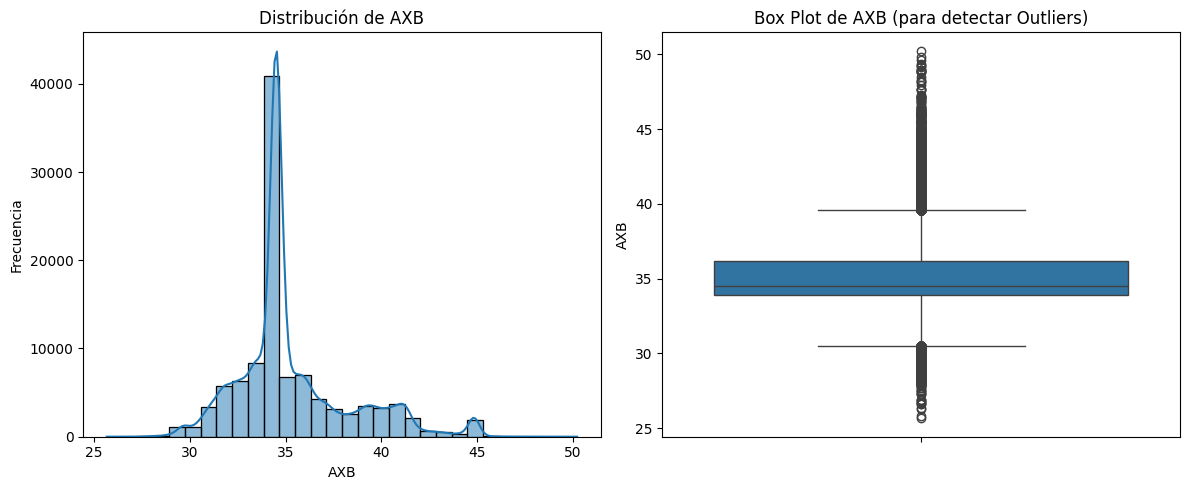

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aseguramos tipo numérico para evitar errores
df['AXB'] = pd.to_numeric(df['AXB'], errors='coerce')

# Eliminar NaN para la visualización
axb_data = df['AXB'].dropna()

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
sns.histplot(axb_data, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribución de AXB')
axes[0].set_xlabel('AXB')
axes[0].set_ylabel('Frecuencia')

# Box plot
sns.boxplot(y=axb_data, ax=axes[1])
axes[1].set_title('Box Plot de AXB (para detectar Outliers)')
axes[1].set_ylabel('AXB')

plt.tight_layout()
plt.show()